# Introduction to Pandas

In this section we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features.

# Series
The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [ ]:
import numpy as np
import pandas as pd

## Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [ ]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

### Using Lists

In [ ]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [ ]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [ ]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

### Using NumPy Arrays

In [ ]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [ ]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

### Using Dictionaries

In [ ]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [ ]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [ ]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [ ]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [ ]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [ ]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [ ]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [ ]:
ser1['USA']

1

Operations are then also done based off of index:

In [ ]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from numpy.random import randn
np.random.seed(101)

In [ ]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [ ]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [ ]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [ ]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [ ]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

DataFrame Columns are just Series

In [ ]:
type(df['W'])

pandas.core.series.Series

### Creating a new column:

In [ ]:
df['new'] = df['W'] + df['Y']

In [ ]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


### Removing Columns

In [ ]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [ ]:
# Not inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [ ]:
df.drop('new',axis=1,inplace=True)

In [ ]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Can also drop rows this way:

In [ ]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


### Selecting Rows

In [ ]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Or select based off of position instead of label 

In [ ]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

### Selecting subset of rows and columns

In [ ]:
df.loc['B','Y']

-0.8480769834036315

In [ ]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [ ]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [ ]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [ ]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [ ]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [ ]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [ ]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:

In [ ]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [ ]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [ ]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [ ]:
newind = 'CA NY WY OR CO'.split()

In [ ]:
df['States'] = newind

In [ ]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [ ]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [ ]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [ ]:
df.set_index('States',inplace=True)

In [ ]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


## DataFrame Summaries
There are a couple of ways to obtain summary data on DataFrames.<br>
<tt><strong>df.describe()</strong></tt> provides summary statistics on all numerical columns.<br>
<tt><strong>df.info and df.dtypes</strong></tt> displays the data type of all columns.

In [ ]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,0.343858,0.453764,0.452287,0.431871
std,1.681131,1.061385,1.454516,0.594708
min,-2.018168,-0.758872,-0.933237,-0.589001
25%,0.188695,-0.319318,-0.848077,0.503826
50%,0.190794,0.628133,0.528813,0.605965
75%,0.651118,0.740122,0.907969,0.683509
max,2.706850,1.978757,2.605967,0.955057


In [ ]:
df.dtypes

W    float64
X    float64
Y    float64
Z    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, CA to CO
Data columns (total 4 columns):
W    5 non-null float64
X    5 non-null float64
Y    5 non-null float64
Z    5 non-null float64
dtypes: float64(4)
memory usage: 200.0+ bytes


# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [ ]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [ ]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [ ]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [ ]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [ ]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [ ]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [ ]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


<strong>Now you can use the .groupby() method to group rows together based off of a column name.<br>For instance let's group based off of Company. This will create a DataFrameGroupBy object:</strong>

In [ ]:
df.groupby('Company')

You can save this object as a new variable:

In [ ]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [ ]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [ ]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


More examples of aggregate methods:

In [ ]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [ ]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [ ]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [ ]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [ ]:
by_comp.describe()

Sales
Company                  
FB      count    2.000000
        mean   296.500000
        std     75.660426
        min    243.000000
        25%    269.750000
        50%    296.500000
        75%    323.250000
        max    350.000000
GOOG    count    2.000000
        mean   160.000000
        std     56.568542
        min    120.000000
        25%    140.000000
        50%    160.000000
        75%    180.000000
        max    200.000000
MSFT    count    2.000000
        mean   232.000000
        std    152.735065
        min    124.000000
        25%    178.000000
        50%    232.000000
        75%    286.000000
        max    340.000000

In [ ]:
by_comp.describe().transpose()

Company    FB                                                         GOOG  \
        count   mean        std    min     25%    50%     75%    max count   
Sales     2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0   2.0   

Company         ...                  MSFT                                   \
          mean  ...      75%    max count   mean         std    min    25%   
Sales    160.0  ...    180.0  200.0   2.0  232.0  152.735065  124.0  178.0   

Company                       
           50%    75%    max  
Sales    232.0  286.0  340.0  

[1 rows x 24 columns]

In [ ]:
by_comp.describe().transpose()['GOOG']

,count,mean,std,min,25%,50%,75%,max
Sales,2.0,160.0,56.568542,120.0,140.0,160.0,180.0,200.0


# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this section:

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [ ]:
df['col2'].unique()

array([444, 555, 666])

In [ ]:
df['col2'].nunique()

3

In [ ]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [ ]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [ ]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [ ]:
def times2(x):
    return x*2

In [ ]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [ ]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [ ]:
df['col1'].sum()

10

### Permanently Removing a Column

In [ ]:
del df['col1']

In [ ]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


### Get column and index names:

In [ ]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=4, step=1)

### Sorting and Ordering a DataFrame:

In [ ]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [ ]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


# Data Input and Output

This section is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [ ]:
import numpy as np
import pandas as pd

## CSV
Comma Separated Values files are text files that use commas as field delimeters.<br>
Unless you're running the virtual environment included with the section, you may need to install <tt>xlrd</tt> and <tt>openpyxl</tt>.<br>
In your terminal/command prompt run:

    conda install xlrd
    conda install openpyxl

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

### CSV Input

In [ ]:
df = pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [ ]:
df.to_csv('example.csv',index=False)

## Excel
Pandas can read and write MS Excel files. However, this only imports data, not formulas or images. A file that contains images or macros may cause the <tt>.read_excel()</tt>method to crash. 

### Excel Input

In [ ]:
pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### Excel Output

In [ ]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## HTML
Pandas can read table tabs off of HTML.<br>
Unless you're running the virtual environment included with the section, you may need to install <tt>lxml</tt>, <tt>htmllib5</tt>, and <tt>BeautifulSoup4</tt>.<br>
In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install beautifulsoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

### HTML Input

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [ ]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [ ]:
df[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"


# Pandas Built-in Data Visualization

In this section we will learn about pandas built-in capabilities for data visualization! It's built off of matplotlib, but it's baked into pandas for easier usage!

For more information on the following topics visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html<br>
For a nice graphic showing the anatomy of a figure with terminology, visit https://matplotlib.org/faq/usage_faq.html

Let's dive in!

## Imports

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

<div class="alert alert-info"><strong>NOTE:</strong><tt><font color=black>&emsp;%matplotlib inline</font></tt> is specific to jupyter notebooks. It allows plots to appear inside the notebook.<br>Note that we are <em>not</em> importing matplotlib here, all of our plots are coming out of pandas.</div>

## The Data

There are some fake data csv files you can read in as dataframes:

In [ ]:
df1 = pd.read_csv('df1.csv', index_col=0)
df2 = pd.read_csv('df2.csv')

# Plot Types

There are several plot types built into pandas; most of them are statistical by nature:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.

Let's start going through them! First we'll look at the data:

In [ ]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [ ]:
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


___
## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html'>[reference]</a>

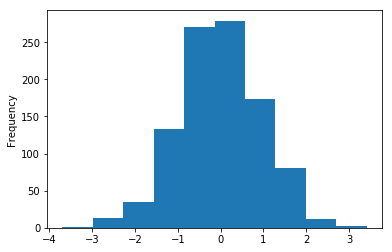

In [ ]:
df1['A'].plot.hist()

<div class="alert alert-info"><strong>NOTE:</strong> To avoid seeing<tt><font color=black>&emsp;Out[5]: &lt;matplotlib.axes._subplots.AxesSubplot at 0x2640e47af60&gt;</font></tt><br>in jupyter you can add a semicolon to the end of the plot line.</div>

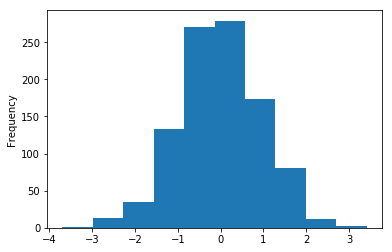

In [ ]:
df1['A'].plot.hist();

We can add settings to do things like bring the x- and y-axis values to the edge of the graph, and insert lines between vertical bins:

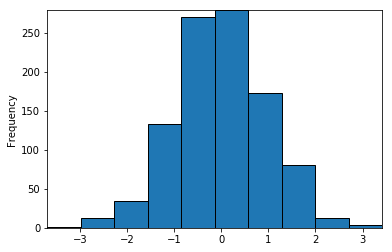

In [ ]:
df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True)

You can use any [matplotlib color spec](https://matplotlib.org/api/colors_api.html) for **edgecolor**, such as `'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'`, or the string representation of a float value for shades of grey, such as `'0.5'`

For **autoscale** the axis can be set to `'x'`, `'y'` or `'both'`

We can also change the number of bins (the range of values over which frequencies are calculated) from the default value of 10:

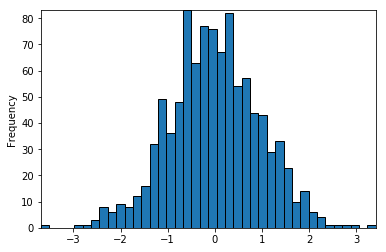

In [ ]:
df1['A'].plot.hist(bins=40, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

<div class="alert alert-info"><strong>NOTE:</strong> Histograms are also accessible with <tt><font color=black>df.hist()</font></tt>, but some changes are made to the default formatting (dropped y-axis label, addition of gridlines)</div>

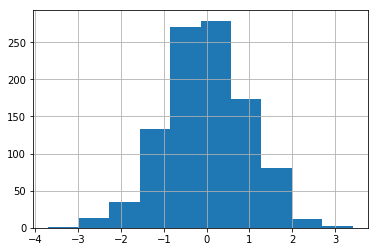

In [ ]:
df1['A'].hist();

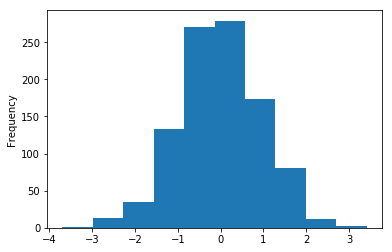

In [ ]:
df1['A'].hist(grid=False).set_ylabel("Frequency");

For more on using <tt>df.hist()</tt> visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html

## Barplots
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html'>[reference]</a>

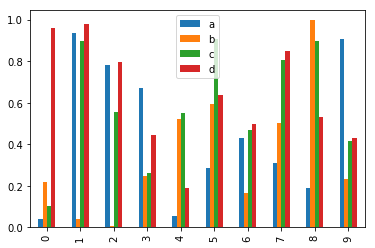

In [ ]:
df2.plot.bar();

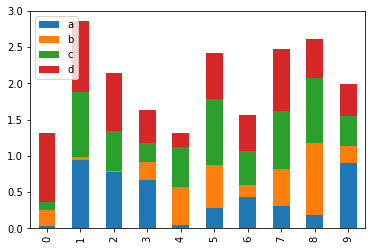

In [ ]:
df2.plot.bar(stacked=True);

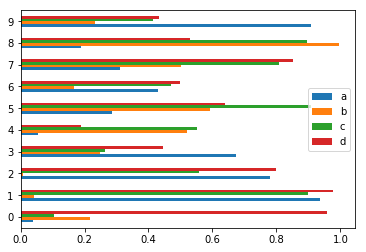

In [ ]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df2.plot.barh();

## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html'>[reference]</a>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

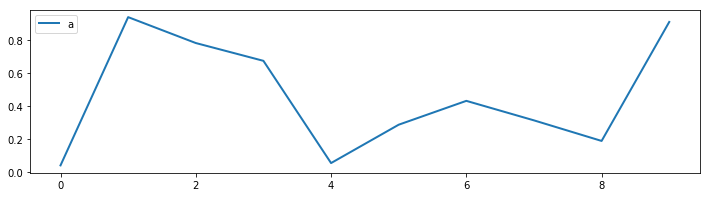

In [ ]:
df2.plot.line(y='a',figsize=(12,3),lw=2);

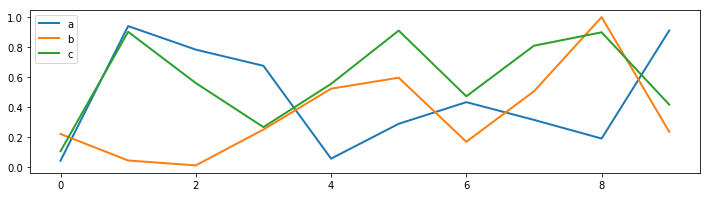

In [ ]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),lw=2);

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.area.html'>[reference]</a>

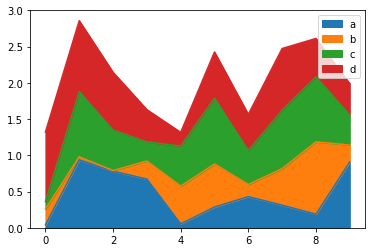

In [ ]:
df2.plot.area();

It often helps to mute the colors by passing an <strong>alpha</strong> transparency value between 0 and 1.

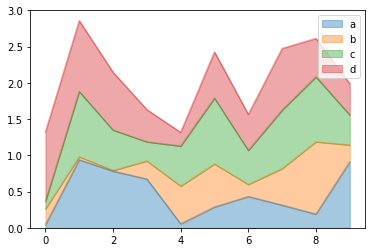

In [ ]:
df2.plot.area(alpha=0.4);

To produce a blended area plot, pass a <strong>stacked=False</strong> argument:

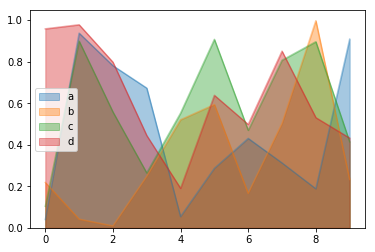

In [ ]:
df2.plot.area(stacked=False, alpha=0.4);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html'>[reference]</a>

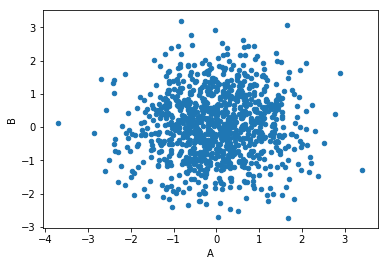

In [ ]:
df1.plot.scatter(x='A',y='B');

### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

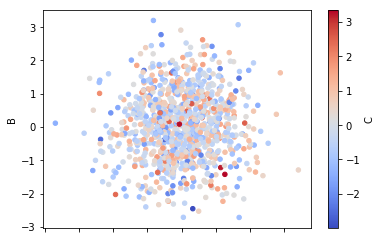

In [ ]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

<div class="alert alert-danger"><strong>NOTE:</strong> As of pandas 0.23.4 there is a <a href='https://github.com/pandas-dev/pandas/issues/10611'>known issue</a> where colormaps chop off the x-axis tics.<br>This is due to be fixed in an <a href='https://github.com/pandas-dev/pandas/pull/20446'>upcoming release</a>. For now, the following matplotlib code will work:</div>

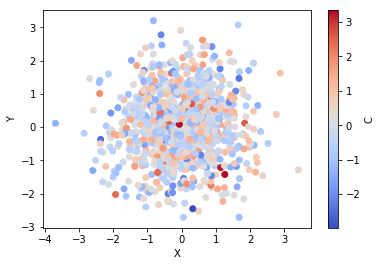

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df1['A'],df1['B'],c=df1['C'],cmap='coolwarm')
plt.colorbar().set_label('C')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Scatter plots with sized markers
Alternatively you can use <strong>s</strong> to indicate marker size based off another column. The <strong>s</strong> parameter needs to be an array, not just the name of a column:

C:\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


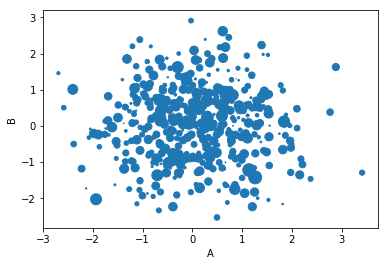

In [ ]:
df1.plot.scatter(x='A',y='B',s=df1['C']*50);

The warning above appeared because some `df1['C']` values are negative. We can fix this finding the minimum value, writing a function that adds to each value, and applying our function to the data with <strong>.apply(func)</strong>.

Also, these data points have a lot of overlap. We can address this issue by passing in an <strong>alpha</strong> blending value between 0 and 1 to make markers more transparent.

In [ ]:
df1['C'].min()

-2.987971138961773

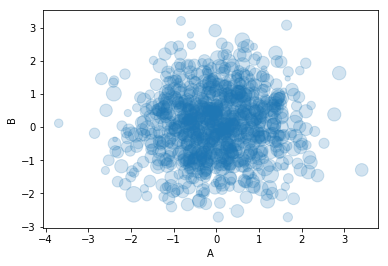

In [ ]:
def add_three(val):
    return val+3

df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*45, alpha=0.2);

Let's see what this looks like with our smaller dataset. Here we'll also apply .autoscale() to tighten the axes.

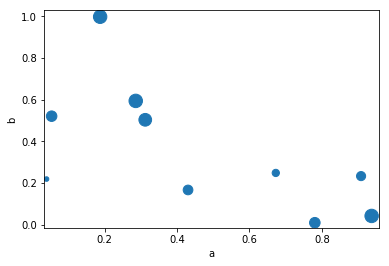

In [ ]:
df2.plot.scatter(x='a',y='b',s=df2['c']*200).autoscale(enable=True, axis='both', tight=True);

## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>
Look <a href='https://en.wikipedia.org/wiki/Box_plot'>here</a> for a description of boxplots. <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots'>[reference]</a>

<div class="alert alert-danger"><strong>NOTE:</strong> At this time we recommend using <tt><font color=black>df.boxplot()</font></tt> instead of <tt><font color=black>df.plot.box()</font></tt> as certain operations such as groupby currently do not work properly in <tt>df.plot.box()</tt>. For more information visit <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html'>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html</a></div></div>

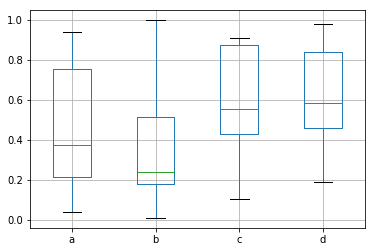

In [ ]:
df2.boxplot();

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

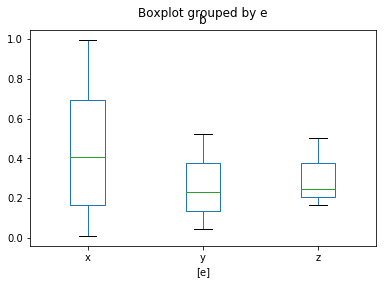

In [ ]:
df2[['b','e']].boxplot(by='e', grid=False);

In the next section on Customizing Plots we'll show how to change the title and axis labels.

## Kernel Density Estimation (KDE) Plot
These plots are accessible either through <tt>df.plot.kde()</tt> or <tt>df.plot.density()</tt> <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.kde.html'>[reference]</a>

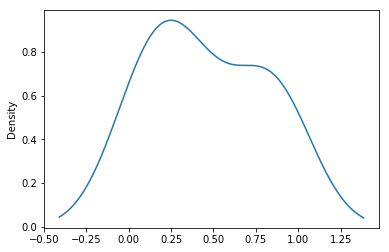

In [ ]:
df2['a'].plot.kde();

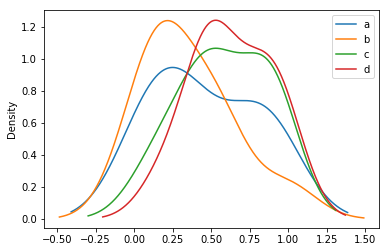

In [ ]:
df2.plot.density();

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html'>[reference]</a>

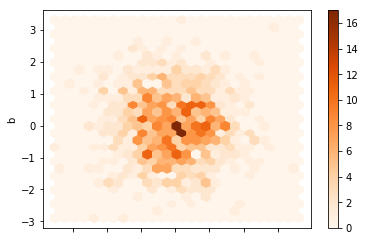

In [ ]:
# FIRST CREATE A DATAFRAME OF RANDOM VALUES
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# MAKE A HEXAGONAL BIN PLOT
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges');

That's it! If you're familiar with matplotlib, hopefully you can see why this method of plotting will be a lot easier to use. Plus, a lot of the plot calls accept the same additional arguments as their parent matplotlib <tt>plt.</tt> call. 


# Customizing Pandas Plots
In this section we'll show how to control the position and appearance of axis labels and legends.<br>
For more info on the following topics visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [ ]:
import pandas as pd
%matplotlib inline

df2 = pd.read_csv('df2.csv')

## Colors, Widths and Linestyles
The pandas <tt>.plot()</tt> method takes optional arguments that allow you to control linestyles, colors, widths and more.

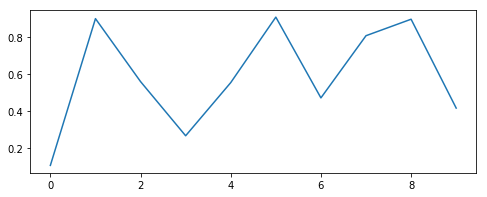

In [ ]:
# START WITH A SIMPLE LINE PLOT
df2['c'].plot(figsize=(8,3));

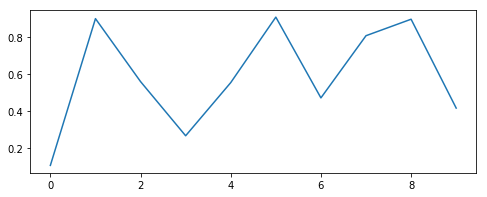

In [ ]:
df2['c'].plot.line(figsize=(8,3));

<table style="display: inline-block">
    <tr><th>PROPERTY</th><th>CODE</th><th>VALUE</th><th>EFFECT</th></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-'</tt></td><td>solid line (default)</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'--'</tt></td><td>dashed line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-.'</tt></td><td>dashed/dotted line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>':'</tt></td><td>dotted line</td></tr>
    <tr><td>color</td><td><tt>c</tt></td><td>string</td><td></td></tr>
    <tr><td>linewidth</td><td><tt>lw</tt></td><td>float</td><td></td></tr>
</table>

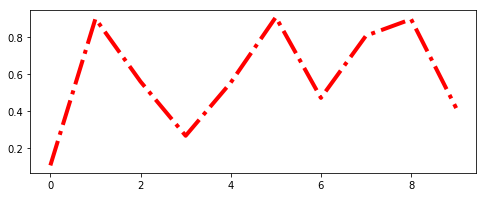

In [ ]:
df2['c'].plot.line(ls='-.', c='r', lw='4', figsize=(8,3));

For more on linestyles, click <a href='https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle'>here</a>.

## Adding Titles and Axis Labels

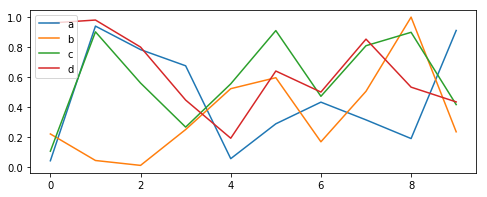

In [ ]:
# START WITH A SIMPLE MULTILINE PLOT
df2.plot(figsize=(8,3));

Before we tackle the issue of legend placement, let's add a title and axis labels.

In the previous section we learned how to pass a title into the pandas .plot() function; as it turns out, we can't pass axis labels this way.<br>

### Object-oriented plotting

When we call <tt>df.plot()</tt>, pandas returns a <tt>matplotlib.axes.AxesSubplot</tt> object. We can set labels
on that object so long as we do it in the same jupyter cell. Setting an autoscale is done the same way.

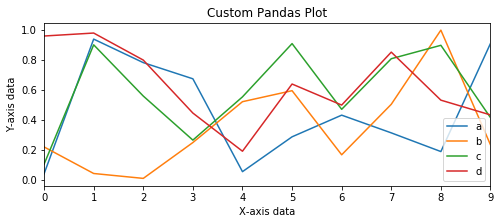

In [ ]:
title='Custom Pandas Plot'
ylabel='Y-axis data'
xlabel='X-axis data'

ax = df2.plot(figsize=(8,3),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True);

<font color=green>NOTE: The plot shrinks a bit so that the figure size can accommodate the new axis labels.</font>

## Plot Legend Placement
Pandas tries to optimize placement of the legend to reduce overlap on the plot itself. However, we can control the placement ourselves, and even place the legend outside of the plot. We do this through the <tt>.legend()</tt> method. <a href='https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html'>[reference]</a>

For starters we can pass a location code. <tt>.legend(loc=1)</tt> places the legend in the upper-right corner of the plot.<br>Alternatively we can pass a location string: <tt>.legend(loc='upper right')</tt> does the same thing.

<table style="display: inline-block">
<tr><th>LOCATION CODE</th><th>LOCATION STRING</th></tr>
<tr><td>0</td><td>'best'</td></tr>
<tr><td>1</td><td>'upper right'</td></tr>
<tr><td>2</td><td>'upper left'</td></tr>
<tr><td>3</td><td>'lower left'</td></tr>
<tr><td>4</td><td>'lower right'</td></tr>
<tr><td>5</td><td>'right'</td></tr>
<tr><td>6</td><td>'center left'</td></tr>
<tr><td>7</td><td>'center right'</td></tr>
<tr><td>8</td><td>'lower center'</td></tr>
<tr><td>9</td><td>'upper center'</td></tr>
<tr><td>10</td><td>'center'</td></tr>
</table>

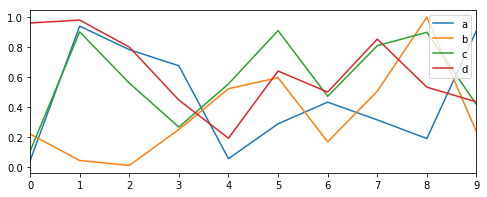

In [ ]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=1);

We can pass a second argument, <tt>bbox_to_anchor</tt> that treats the value passed in through <tt>loc</tt> as an anchor point, and positions the legend along the x and y axes based on a two-value tuple.

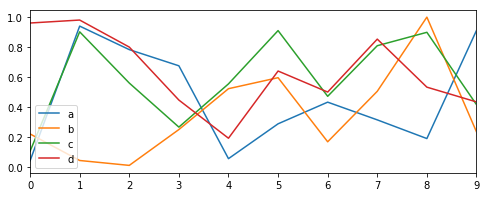

In [ ]:
# FIRST, PLACE THE LEGEND IN THE LOWER-LEFT
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3);

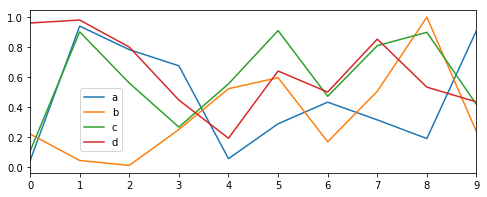

In [ ]:
# NEXT, MOVE THE LEGEND A LITTLE TO THE RIGHT AND UP
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(0.1,0.1));

### Placing the Legend Outside the Plot
In the above plot we passed <tt>(0.1,0.1)</tt> as our two-item tuple. This places the legend slightly to the right and slightly upward.<br>To place the legend outside the plot on the right-hand side, pass a value greater than or equal to 1 as the first item in the tuple.

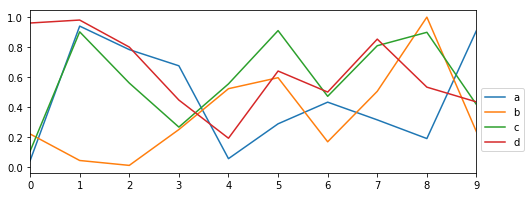

In [ ]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.1));

____